Welcome to the first handson!!!
- In this handson you will be building an deep neural network network for multiclass classification using softmax regression.
- You will also be implementing minibatch gradient descent to train you network
- Follow the instruction provided for cell to write the code in each cell.

In [2]:
#Run this cell without modifying
import hashlib
import pickle
def gethex(ovalue):
  hexresult=hashlib.md5(str(ovalue).encode())
  return hexresult.hexdigest()


- The data is provided as file named 'data.csv' in data folder

---


- The data has two features feature1 and feature2 and one targer variable which is a binary value
- Using pandas read the csv file and assign the resulting dataframe to variable 'data'   
- for example if file name is 'xyz.csv' read file as **pd.read_csv('xyz.csv')**
- Packages to import: **pandas** (to read csv file)

In [3]:
###start code here
                 #import pandas
import pandas as pd    
data = pd.read_csv("data/data.csv")
### end code(aprox 2 lines)
print(data.head())

   feature1  feature2  class
0  0.986038  0.065523    3.0
1 -1.460077  1.651296    3.0
2 -0.896203 -1.279647    3.0
3  0.094218 -5.933941    2.0
4  2.864974 -8.743053    1.0


- Extract feature1 and feature2 values from dataframe 'df' and assign it to variable 'X'
- Extract target variable 'traget' and assign it to variable 'y'.  
Hint:
 - Use .values to exract values from dataframe

In [4]:
#Start Code
X =  data[['feature1', 'feature2']].values                                        #Extract feature1 and feature2 values
Y =  data['class'].values                                        #Extract target values
#End code
print("target labels: ", list(set(Y)))

assert X.shape == (2000, 2)
assert Y.shape == (2000, )

target labels:  [0.0, 1.0, 2.0, 3.0]


- There are four target lables mapped as 0,1,2 and 3
- Run the below cell to visualize the data in x-y plane. (visualization code has been written for you)
- The blue spots corresponds to target value 0, green corresponds to 1, red corresponds to 2 and yellow to 4.

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors
colors=['blue','green','red', 'yellow']
cmap = matplotlib.colors.ListedColormap(colors)
#Plot the figure
plt.figure()
plt.title('Non-linearly separable classes')
plt.scatter(X[:,0], X[:,1], c=Y,
           marker= 'o', s=50,cmap=cmap,alpha = 0.5 )
plt.show()

<Figure size 640x480 with 1 Axes>

import tensorflow package as tf

In [6]:
import tensorflow as tf
import numpy as np
#import tensorflow

- perform one hot encoding on target Y. Use tensorflow's one_hot() function, make sure mapping is done column-wise

In [7]:
labels = list(set(Y))
#Start Code
depth = len(np.unique(Y))                    #number of unique labels
#End code
print("labels: ", labels)
with tf.Session() as sess:
###start code here
     YtrainOneHot = tf.one_hot(Y, depth, axis = 0) # columnwise: axis = 0, axis=-1 row-wise
     Y_onehot = sess.run(YtrainOneHot)
###End code
assert Y_onehot.shape == (4, 2000)

print("\nfirst five rows of target Y:\n", Y[:5])
print("\nfirst five rows of target Y_onehot:\n", Y_onehot[:,:5])
print("X dimension:{} ,Y_onehot dimension:{}".format(X.shape, Y_onehot.shape))

labels:  [0.0, 1.0, 2.0, 3.0]

first five rows of target Y:
 [3. 3. 3. 2. 1.]

first five rows of target Y_onehot:
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 1. 1. 0. 0.]]
X dimension:(2000, 2) ,Y_onehot dimension:(4, 2000)


- In order to feed the network the input has to be of **shape (number of features, number of samples)** and target should be of shape **(1, number of samples)**
- Transpose X and assign it to variable 'X_data'
- target Y_onehot is already in shape, so just assign Y to variable Y_data

In [8]:
##Start code
X_data = X.T
Y_data = Y_onehot
##End code

Define the network dimension to have two input features, two hidden layers with 25 nodes each, 4 output nodes at final layer. 

In [9]:
#Start code
layer_dims = [2, 25, 25, 4]
#End code

Define a function named placeholders to return two placeholders one for input data as A_0 and one for output data as Y.
- Set the datatype of placeholders as float64
- parameters - num_features
- Returns - A_0 with shape (num_feature, None) and Y with shape(1,None)

In [10]:
def placeholders(num_features, num_classes):
    A_0 = tf.placeholder(dtype = tf.float64, shape = ([num_features,None]))
    Y = tf.placeholder(dtype = tf.float64, shape = ([num_classes,None]))
    return A_0,Y

Define function named initialize_parameters_deep() to initialize weights and bias for each layer
- Use tf.get_variable to initialise weights and bias, set datatype as float64
- Make sure you are using xavier initialization for weigths and initialize bias to zeros
- Parameters - layer_dims
- Returns - dictionary of weights and bias

In [11]:
def initialize_parameters_deep(layer_dims):
    tf.set_random_seed(1)
    L = len(layer_dims)
    parameters = {}
    for l in range(1,L):
        parameters['W' + str(l)] = tf.get_variable("W" + str(l), shape=[layer_dims[l], layer_dims[l-1]], dtype = tf.float64,
                                   initializer=tf.contrib.layers.xavier_initializer())
        parameters['b' + str(l)] = tf.get_variable("b"+ str(l), shape = [layer_dims[l], 1], dtype= tf.float64, initializer= tf.zeros_initializer() )
    return parameters 

Define functon named linear_forward_prop() to define forward propagation for a given layer.
- parameters: A_prev(output from previous layer), W(weigth matrix of current layer), b(bias vector for current layer),activation(type of activation to be used for out of current layer)  
- returns: A(output from the current layer)
- Use relu activation for hidden layers and for final output layer return the output unactivated i.e if activation is 'softmax'

In [12]:
def linear_forward_prop(A_prev,W,b, activation):
    #Start code here 
    Z =  tf.add(tf.matmul(W, A_prev), b)       
    if activation == "softmax":
        A = Z
    elif activation == "relu":
        A = tf.nn.relu(Z) 
    return A
   #End code

forward propagation for entire network is defined for you as l_layer_forward(). We are not using any regularization technique here.

In [13]:
def l_layer_forwardProp(A_0, parameters):
    A = A_0
    L = len(parameters)//2
    for l in range(1,L):
        A_prev = A
        A = linear_forward_prop(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], "relu")
    A = linear_forward_prop(A, parameters['W' + str(L)], parameters['b' + str(L)], "softmax" )
    return A

- Define cost function as final_cost()
- The logits and target value has to be in shape (number of samples, number of class) for      
softmax_cross_entropy_with_logits() function to calculate cost
- since Z_final and Y are tensoflow object we are using tf.transpose() before feeding  softmax_cross_entropy_with_logits()

In [14]:
def final_cost(Z_final, Y ):
    logits = tf.transpose(Z_final)
    labels = tf.transpose(Y)
    ###Start code
    cost = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels)    ###End code
    return tf.reduce_mean(cost)

Define the function to generate mini-batches.

In [15]:
import numpy as np
def random_samples_minibatch(X, Y, batch_size, seed = 1):
    np.random.seed(seed)
    m = X.shape[1]                                 #number of samples
    num_batches = int(m/batch_size)                #number of batches derived from batch_size
    indices = np.random.permutation(m)             # generate ramdom indicies
    shuffle_X = X[:,indices]
    shuffle_Y = Y[:,indices]
    mini_batches = []
    
    #generate minibatch
    for i in range(num_batches):
        ##Start code here
        X_batch = shuffle_X[:,i * batch_size:(i+1) * batch_size]
        Y_batch = shuffle_Y[:,i * batch_size:(i+1) * batch_size]
        ##End code
        
        assert X_batch.shape == (X.shape[0], batch_size)
        assert Y_batch.shape == (Y.shape[0], batch_size)
        
        mini_batches.append((X_batch, Y_batch))
    
    #generate batch with remaining number of samples
    if m % batch_size != 0:
        ##Srart code here
        X_batch = shuffle_X[:, (num_batches * batch_size):]
        Y_batch = shuffle_Y[:, (num_batches * batch_size):]
        ##Srart code here
        mini_batches.append((X_batch, Y_batch))
    return mini_batches

Define the model to train the network using minibatch
- parameters:
  - X_train, Y_train: input and target data
  - layer_dims: network configuration
  - learning_rate
  - num_iter: number of epoches
  - mini_batch_size: number of samples to be considered in each minibatch
- return: dictionary of trained parameters

In [16]:
def model_with_minibatch(X_train,Y_train, layer_dims, learning_rate, num_iter, mini_batch_size):
    
    tf.reset_default_graph()
    num_features, num_samples = X_train.shape
    num_classes = Y_train.shape[0]
    A_0, Y = placeholders(num_features, num_classes)
    parameters = initialize_parameters_deep(layer_dims)
    Z_final = l_layer_forwardProp(A_0, parameters)
    cost = final_cost(Z_final, Y)
    train_net = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    seed = 1
    num_minibatches = int(num_samples / mini_batch_size)
    init = tf.global_variables_initializer()
    costs = []
    
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_iter):
            epoch_cost = 0
            mini_batches = random_samples_minibatch(X_train, Y_train, mini_batch_size, seed) #generate array of minibatch using random_samples_minibatch()
            seed = seed + 1
            
            #perform gradient descent for each mini-batch
            for mini_batch in mini_batches: 
                ##Start code
                X_batch, Y_batch = mini_batch
                _,mini_batch_cost = sess.run([train_net, cost], feed_dict={A_0: X_batch, Y: Y_batch})
                ##End code
                
                epoch_cost += mini_batch_cost/num_minibatches
            if epoch % 1 == 0:
                costs.append(epoch_cost)
            if epoch % 10 == 0:
                print(epoch_cost)
        #save your answer in pkl file. Donot modify
        with open('output/output1.pkl', 'wb') as file:
          hexresult=gethex(round(costs[-1],2))
          print(hexresult)
          pickle.dump(hexresult,file)
            
        plt.ylim(0, max(costs), 0.0001)
        plt.xlabel("epoches per 100")
        plt.ylabel("cost")
        plt.plot(costs)
        plt.show()
        params = sess.run(parameters)
    return params

0.8797401636011671
0.39547961779391066
0.33954503596502617
0.30608861826531714
0.2880744663267645
0.2753135010039041
0.2704542798552976
0.26571231209151247
0.26219009614350147
0.26331014633095196
261943f3a93b683ceeac658927f3923f


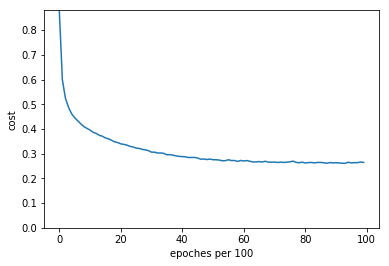

In [17]:
params = model_with_minibatch(X.T, Y_onehot, layer_dims, 0.01, 100, 32)

- The function to predict the ouput has been defined for you.  
- The function takes input and trained parameters and predict the output using forward propagation  
- the arg_max function returns the index of largest probability value in out y of each sample  

In [18]:
def predict(X_train, params):
    with tf.Session() as sess:
        Y = tf.arg_max(l_layer_forwardProp(X_train,params), dimension=0)
        return sess.run(Y)

Run the next two cell to visualize the boundary predicted by the model (This takes slightly longer time for the plot to appear)


In [19]:
def plot_decision_boundary1( X, y, model):
    plt.clf()
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1   
    colors=['blue','green','red', 'yellow']
    cmap = matplotlib.colors.ListedColormap(colors)   
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    A = model(np.c_[xx.ravel(), yy.ravel()])
    A = A.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, A, cmap="spring")
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, s=8,cmap=cmap)
    plt.title("Decision Boundary")
    plt.show()

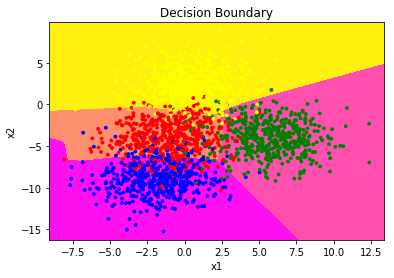

In [20]:
plot_decision_boundary1(X_data,Y,lambda x: predict(x.T,params))